### 프로젝트기반 빅데이터 개발자 양성 과정
#### 자연어처리 기초 Part1

- 강사: 전대일, 천재교육 AI센터 데이터분석기획팀장
<p>

- 일정: 2024.1.4 ~ 1.5(2일)
<p>

- 교육내용 Day1
    - 텍스트 기본기, 정규식(Regex) 
    - NLTK, Standford Core NLP
    - 미니 프로젝트 진행(수능 영어 구문 분석)
        - 최근 3년간 수학능력평가 영어 시험에서 등장한 모든 문장을 수집하여 연도별 통계 분석을 수행하라.
        - 기초: 연도별 영문장의 길이 분포, 연도별 고유 단어수, 연도별 최다 빈출어 분포 및 Top 20, 연도별 워드클라우드
        - 난이도: ‘To 부정사’가 포함된 문장을 찾아 전체 수능 영어문장 대비 빈도를 구하라(단, ‘To 부정사’가 포함된 문장을 정확하게 식별하기 어려울 수 있음)
- 교육내용 Day2
    - RNN 언어처리 개념
    - 미니프로젝트: 공룡이름 생성기(Character Level Language Model)
        - 공룡화석 발굴학자들에게 이름 만들기란 어려운 문제
        - 기존의 공룡 이름 데이터로 문자수준의 언어모델을 훈련하여, 새로운 그럴듯한 공룡이름을 생성한다.

<p>

#### 2. 미니프로젝트
- 한국교육과정평가원 수능기출문제 사이트에서 영어영역 3개년도(21~23) 다운로드
- https://www.suneung.re.kr/boardCnts/list.do?boardID=1500234&m=0403&s=suneung
- [주의] 파일명에 수능 연도를 포함하게 저장하여, 이후 정제과정에서 값으로 사용한다.
- 신규 폴더 생성해서 모아둔다.

- PDF 추출기 설치

In [1]:
# 각자 PDF에서 텍스트를 추출하는 라이브러리를 찾아본다.
# 관련 게시글을 검토해서 테스트를 희망하는 라이브러리를 사용해본다.
# tika 는 java 8이 필요. 설치 확인 후 진행.
!pip install tika


- Tika 기능 살펴보기

In [2]:
from tika import parser

raw = parser.from_file('C://Users//user//Desktop//NLP_day1//exam_files//수능영어22년.pdf')

2024-01-04 16:44:59,309 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [3]:
type(raw)

dict

In [4]:
raw.keys()

dict_keys(['metadata', 'content', 'status'])

In [5]:
raw['content'][0:2000]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<BFB5BEEE5FC8A65F313130325F3232BDC33135BAD02E687770>\n\n\n1\n8\n\n  1번부터 17번까지는 듣고 답하는 문제입니다. 1번부터 \n\n15번까지는 한 번만 들려주고, 16번부터 17번까지는 두 번 \n\n들려 니다. 방송을 잘 듣고 답을 하시기 바랍니다.\n\n1. 다음을 듣고, 여자가 하는 말의 목 으로 가장 한 것을 \n\n고르시오.\n\n① 조련사 자격증 취득 방법을 설명하려고\n\n② 동물 병원 확장 이 을 공지하려고\n\n③ 새로 출시된 개 사료를 소개하려고\n\n④ 반려동물 입양 차를 안내하려고\n\n⑤ 개 훈련 센터를 홍보하려고\n\n2. 화를 듣고, 남자의 의견으로 가장 한 것을 고르시오.\n\n① 여행 에 합리 으로 산을 계획해야 한다.\n\n② 여행 가서 할 것을 무 많이 계획하면 안 된다.\n\n③ 인생에서 자신의 원칙을 고수하는 것이 요하다.\n\n④ 여행은 사고의 폭을 확장시켜 사람을 성장하게 한다.\n\n⑤ 보호자 없이 학생끼리 여행하는 것은 안 하지 않다.\n\n3. 화를 듣고, 두 사람의 계를 가장 잘 나타낸 것을 고르시오.\n\n① 라디오 쇼 진행자－ 제빵사 ② 리포터－ 과수원 주인\n\n③ 고주－ 요리사 ④ 방송 작가－ 경제학자\n\n⑤ 유통업자－ 농부\n\n4. 화를 듣고, 그림에서 화의 내용과 일치하지 않는 것을 고르시오.\n\n5. 화를 듣고, 남자가 할 일로 가장 한 것을 고르시오.\n\n① 리본 가져오기 ② 선 라스 주문하기\n\n③ 사진사 섭외하기 ④ 설문 조사 실시하기\n\n⑤ 졸업 연설문 작성하기\n\n6. 화를 듣고, 여자가 지불할 액을 고르시오. [3 ]\n\n① $36 ② $45 ③ $50 ④ $54 ⑤ $60\n\n7. 화를 듣고, 남자가 탁구 연습을 할 수 없는 이유를 고르시오.\n\n① 학교 도서 에 자원 사를 하러

In [6]:
import re

cleansed = re.sub('[^A-Za-z0-9,.?!;\'\"]+',' ', raw['content'])

cleansed[0:2000]

' BFB5BEEE5FC8A65F313130325F3232BDC33135BAD02E687770 1 8 1 17 . 1 15 , 16 17 . . 1. , . 2. , . . . . . . 3. , . 4. , . 5. , . 6. , . 3 36 45 50 54 60 7. , . 8. , Little Readers Class . 9. 2021 Family Science Festival , . 12 7 . 8 . . 11 . . 10. , . Study Rooms Room Capacity persons Available Times Price per hour Projector A 2 3 9 a.m. 11 a.m. 10 B 4 6 9 a.m. 11 a.m. 16 C 4 6 2 p.m. 4 p.m. 14 D 6 8 2 p.m. 4 p.m. 19 E 6 9 4 p.m. 6 p.m. 21 11. , . Just give me about ten minutes. It took an hour for us to get back home. I think you need to focus on your work. It was nice of you to invite my co workers. Call me when you finish sending the email. 12. , . Excellent. I like the camera you bought for me. Good. I ll stop by and get it on my way home. Never mind. I ll drop off the camera tomorrow. I see. Thanks for taking those pictures of me. No way. That s too expensive for the repair. 2022 1 3 . 2 2 8 13. , . 3 Man No worries. Stress is not always as bad as you think. Don t forget to bring a c

In [7]:
result = cleansed.split(".")
result[200:260]

[' His buildings influenced other architects for centuries',
 ' Piero della Francesca ',
 ' Milan ',
 ' ',
 ' Pope Julius II Rome ',
 ' ',
 ' 27',
 ' Cornhill No Paper Cup Challenge ? ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' 28',
 ' Goldbeach SeaWorld Sleepovers ? 7 ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' Cornhill No Paper Cup Challenge Cornhill High School invites you to join the No Paper Cup Challenge',
 ' This encourages you to reduce your use of paper cups',
 ' Let s save the earth together! How to Participate 1 After being chosen, record a video showing you are using a tumbler',
 ' 2 Choose the next participant by saying his or her name in the video',
 ' 3 Upload the video to our school website within 24 hours',
 ' The student council president will start the challenge on December 1st, 2021',
 ' Additional Information The challenge will last for two weeks',
 ' All participants will receive T shirts',
 ' If you have questions about the challenge, contact us at cornhillsc chs',
 'edu',
 ' Goldbeach SeaW

In [8]:
len(result)

395

In [9]:
# !pip install pandas

In [10]:
## Reslut 리스트를 DataFrame으로 변경
## Dataframe의 각 레코드에 비문/문장 점검 후, 값을 새로운 컬럼에 추가
## 예) 42..R..2 --> 0, I need water --> 1
## 점검 결과 1인 레코드만 추출 --> 수능영어문장 추출 끝!

import pandas as pd

#raw_split = pd.DataFrame(result)
raw_split = pd.DataFrame({'raw_data':result})

raw_split[53:57]

,raw_data
53,21 11
54,","
55,Just give me about ten minutes
56,It took an hour for us to get back home


In [11]:
# 위에서 split 사용시 각 항목 앞에 공백이 생성되어 이를 제거한다.

raw_split['raw_data'] = raw_split['raw_data'].apply(lambda x: x.strip())

In [12]:
# 위에서 split 사용시 마침표가 제거되어, 이를 추가한다.

raw_split['raw_data'] = raw_split['raw_data'].apply(lambda x: x+'.')
raw_split[53:57]

,raw_data
53,21 11.
54,",."
55,Just give me about ten minutes.
56,It took an hour for us to get back home.


In [13]:
# split 사용으로 인한 문제들(첫 공백, 마침표 소실) 정제 완료

raw_split['raw_data'][55]

'Just give me about ten minutes.'

In [14]:
def sent_Checker(text):

    # 영문장 조건에 맞도록 정규식 함수
    # 첫문자: 영문 대문자
    # 끝문자: 마침표

    pattern1 = '^[A-Z].*\.$'

    if re.search(pattern1,  text):
        return True

    else:
        return False


raw_split['Checker'] = raw_split['raw_data'].apply(lambda x: 1 if sent_Checker(x) else 0)
raw_split[53:70]

,raw_data,Checker
53,21 11.,0
54,",.",0
55,Just give me about ten minutes.,1
56,It took an hour for us to get back home.,1
57,I think you need to focus on your work.,1
58,It was nice of you to invite my co workers.,1
59,Call me when you finish sending the email.,1
60,12.,0
61,",.",0
62,Excellent.,1


- 위 정규식으로는 숫자로 시작하는 문법에 맞는 문장을 0으로 표시함
- 예) "2002 World Cup was held in Seoul, Korea."
- 정규식을 고도화하거나 다른 대안이 필요
- 다만 비용대비 효과를 고려하여 포기할 수도 있음.

In [15]:
# 필터링 걸고, 간단한 통계 분석

valied_sent = raw_split[raw_split['Checker']==1]
valied_sent['letter_cnt'] = valied_sent['raw_data'].apply(lambda x: len(x))
valied_sent['word_cnt'] = valied_sent['raw_data'].apply(lambda x: len(x.split()))
valied_sent.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_18112\794398744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valied_sent['letter_cnt'] = valied_sent['raw_data'].apply(lambda x: len(x))
C:\Users\user\AppData\Local\Temp\ipykernel_18112\794398744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valied_sent['word_cnt'] = valied_sent['raw_data'].apply(lambda x: len(x.split()))


,raw_data,Checker,letter_cnt,word_cnt
0,BFB5BEEE5FC8A65F313130325F3232BDC33135BAD02E68...,1,60,5
33,Study Rooms Room Capacity persons Available Ti...,1,85,16
55,Just give me about ten minutes.,1,31,6
56,It took an hour for us to get back home.,1,40,10
57,I think you need to focus on your work.,1,39,9
58,It was nice of you to invite my co workers.,1,43,10
59,Call me when you finish sending the email.,1,42,8
62,Excellent.,1,10,1
63,I like the camera you bought for me.,1,36,8
64,Good.,1,5,1


<Axes: >

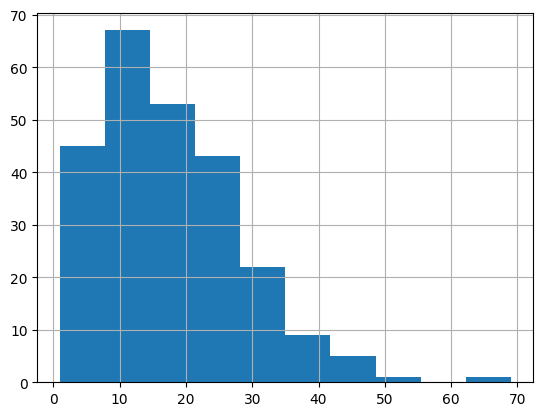

In [16]:
valied_sent['word_cnt'].hist()

<Axes: >

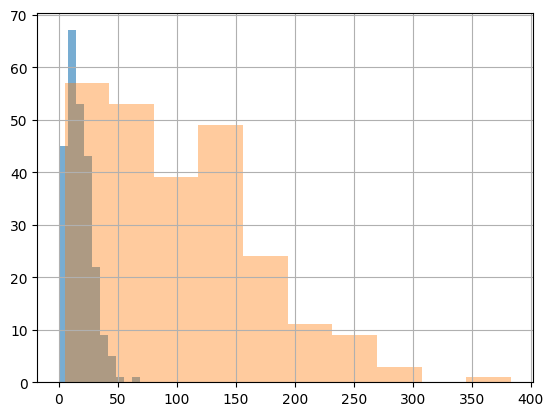

In [17]:
valied_sent['word_cnt'].hist(alpha=0.6)
valied_sent['letter_cnt'].hist(alpha=0.4)

- 여러 파일 읽어서, 데이터 추출하기

In [18]:
# 수능 문제 파일이 저장되어 있는 폴더에서 파일명 읽어오기
# 다양한 접근방법 참조
# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

import os

filelist = os.listdir("C://Users//user//Desktop//NLP_day1//exam_files") #상대경로

filelist #주의: 파일명만 있는 리스트임

['수능영어21년.pdf', '수능영어22년.pdf', '수능영어23년.pdf']

In [19]:
# 목표 연도별 수능 영어 파일에서 영문장만 추출
# 연도가 관리되야함

from tika import parser
import re
import pandas as pd

year_list =[]
sent_list = []

for file in filelist:

    # 파일 제목에서 연도 추출
    year = re.findall(r'\d+', file)[0]

    path="C://Users//user//Desktop//NLP_day1//exam_files/" + file
    raw = parser.from_file(path) 

    # 1차 정제 및 분할
    cleansed = re.sub('[^A-Za-z0-9,.?!;\'\"]+',' ', raw['content'])
    result = cleansed.split(".")

    # 파일별로 split 된 문장들의 길이만큼 연도, 문장을 각 리스트로 생성
    for i in range(len(result)):
        year_list.append(year)
        sent_list.append(result[i])

sentences_df = pd.DataFrame({'year': year_list, 'raw_data':sent_list})


# raw 데이터 추출 과정의 split 사용 이슈 처리
sentences_df['raw_data'] = sentences_df['raw_data'].apply(lambda x: x.strip())
sentences_df['raw_data'] = sentences_df['raw_data'].apply(lambda x: x+'.')

- 추출 데이터 검사

In [20]:
# sentences_df.head()
sentences_df[50:60] # 임의구간을 탐색해본다.

,year,raw_data
50,21,I don t want my car to be painted.
51,21,Never mind.
52,21,I ll pay the parking fee later.
53,21,Okay.
54,21,I ll choose another car instead.
55,21,2021 1 3.
56,21,2 2 8 13.
57,21,",."
58,21,3 Woman Sorry.
59,21,I don t think I can wait until tomorrow for th...


In [21]:
sentences_df.groupby('year').size()

year
21    395
22    395
23    743
dtype: int64

- 아까 처리한 checker 함수, checker1으로 이름만 변경해서 재사용(checker2, checker3 추가 예정)

In [22]:
# 영문장 확인 함수1

def sent_Checker1(text):

    # 영문장 조건에 맞도록 정규식 함수
    # 첫문자: 영문 대문자
    # 끝문자: 마침표

    pattern1 = '^[A-Z].*\.$'

    if re.search(pattern1,  text):
        return True

    else:
        return False

In [23]:
# sent_Checker1 적용해서 1차로 검사를 한다.

sentences_df['Checker'] = sentences_df['raw_data'].apply(lambda x: 1 if sent_Checker1(x) else 0)

sentences_df.head()

,year,raw_data,Checker
0,21,BFB5BEEE5FC8A62E687770 1 8 1 17.,1
1,21,"1 15 , 16 17.",0
2,21,.,0
3,21,1.,0
4,21,",.",0


In [24]:
# checker1 적용하여 데이터 필터링

# 유효한 문장만 subset
valid_sent = sentences_df[sentences_df['Checker']==1]

# 문자길이 계산
valid_sent['letter_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x))

# 단어길이 계산(단순 띄어쓰기 기준)
valid_sent['word_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x.split()))

valid_sent.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18112\2702301512.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_sent['letter_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x))
C:\Users\user\AppData\Local\Temp\ipykernel_18112\2702301512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_sent['word_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x.split()))


,year,raw_data,Checker,letter_cnt,word_cnt
0,21,BFB5BEEE5FC8A62E687770 1 8 1 17.,1,32,5
25,21,"National Baking Competition ,.",1,30,4
33,21,Reusable Straw Sets 3 pieces Set Material Pric...,1,87,15
40,21,I don t feel like going out today.,1,34,8
41,21,You must get to the airport quickly.,1,36,7


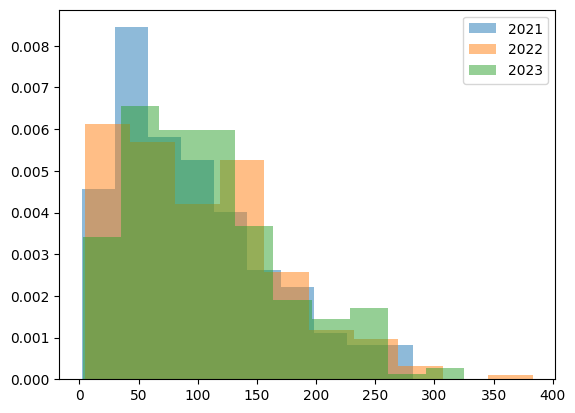

In [25]:
# 연도별 통계 분석
#import matplotlib as pyplot
import matplotlib.pyplot as plt

len2021 = valid_sent[valid_sent['year']=='21']['letter_cnt']
len2022 = valid_sent[valid_sent['year']=='22']['letter_cnt']
len2023 = valid_sent[valid_sent['year']=='23']['letter_cnt']

plt.hist(len2021, alpha=0.5, label='2021', density=True)  #밀도
plt.hist(len2022, alpha=0.5, label='2022', density=True)  #밀도
plt.hist(len2023, alpha=0.5, label='2023', density=True)  #밀도
plt.legend(loc='upper right')
plt.show()


- To 부정사 진단
    - 정규식도 가능하긴 하다. 확률의 문제
    - NLTK 품사 태거를 활용한다.
    - NLTK(Natural Language Tool Kits) 컴퓨터 언어처리 기초 지식의 보고

In [26]:
!pip install nltk

In [27]:
import nltk
nltk.download('punkt')

### NLTK 공식 문서 예제로 토크나이저 개념파악

from nltk.tokenize import word_tokenize

s = '''Good muffins cost $3.88\nin New York.  Please buy me
... two of them.\n\nThanks.'''

word_tokenize(s)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Good',
 'muffins',
 'cost',
 '$',
 '3.88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 '...',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

In [28]:
from nltk.tokenize import sent_tokenize, word_tokenize

sent_tokenize(s)

[t for t in sent_tokenize(s)]

[word_tokenize(t) for t in sent_tokenize(s)]

[['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.'],
 ['Please', 'buy', 'me', '...', 'two', 'of', 'them', '.'],
 ['Thanks', '.']]

In [29]:
# 수능 영어 문장 분석을 python split 말고,
# NLTK 토크나이저로 처리한다.

import re
import pandas as pd
from tika import parser
from nltk import tokenize #파이썬 내장 split 말고, NLTK로 진행


year_list =[]
sent_list = []

for file in filelist:

    # 파일 제목에서 연도 추출(파일명에 연도가 없으면 의미가 없음)
    year = re.findall(r'\d+', file)[0]

    path="C://Users//user//Desktop//NLP_day1//exam_files/" + file

    #path를 tika PDF 라이브러리에 전달
    raw = parser.from_file(path) #메모리 관리 측면에서 그리 효율적이지는 않은 접근

    # 1차 정제 및 분할

    # 파이썬 내장 정규식+split 으로 하는 방식
    # cleansed = re.sub('[^A-Za-z0-9,.?!;\'\"]+',' ', raw['content'])
    # result = cleansed.split(".")

    #NLKT 토크나이저 활용 방식
    cleansed = re.sub('[^A-Za-z0-9,.?!;\'\"]+',' ', raw['content'])
    result = tokenize.sent_tokenize(cleansed)

    # 파일별로 split 된 문장들의 길이만큼 연도, 문장을 각 리스트로 생성
    for i in range(len(result)):
        year_list.append(year)
        sent_list.append(result[i])

sentences_df = pd.DataFrame({'year': year_list, 'raw_data':sent_list})
sentences_df.head()


# 비고 - NLTK는 문장 마침표를 잘 보존하기 때문에
# 아래 split 사용에 따른 정제 필요가 없어진다. 교육용으로 주석처리. 

# sentences_df['raw_data'] = sentences_df['raw_data'].apply(lambda x: x.strip())
# sentences_df['raw_data'] = sentences_df['raw_data'].apply(lambda x: x+'.')

,year,raw_data
0,21,BFB5BEEE5FC8A62E687770 1 8 1 17 .
1,21,"1 15 , 16 17 ."
2,21,.
3,21,"1. , ."
4,21,"2. , ."


In [30]:
# 내장 split 활용 결과
# 2021    395
# 2022    395
# 2023    743

# NLTK Tokenizer 활용 결과
sentences_df.groupby('year').size()

year
21    385
22    365
23    742
dtype: int64

In [31]:
# NLTK로 뽑은 데이터에 아까 만들어둔 Checker1을 적용해서 필터링.

sentences_df['Checker1'] = sentences_df['raw_data'].apply(lambda x: 1 if sent_Checker1(x) else 0)

sentences_df.head()

,year,raw_data,Checker1
0,21,BFB5BEEE5FC8A62E687770 1 8 1 17 .,0
1,21,"1 15 , 16 17 .",0
2,21,.,0
3,21,"1. , .",0
4,21,"2. , .",0


In [32]:
# 유효한 문장만 subset
valid_sent = sentences_df[sentences_df['Checker1']==1]

# 문자길이 계산
valid_sent['letter_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x))

# 단어길이 계산(단순 띄어쓰기 기준)
valid_sent['word_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x.split()))

valid_sent.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18112\714914042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_sent['letter_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x))
C:\Users\user\AppData\Local\Temp\ipykernel_18112\714914042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_sent['word_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x.split()))


,year,raw_data,Checker1,letter_cnt,word_cnt
17,21,"National Baking Competition , .",1,31,5
24,21,Reusable Straw Sets 3 pieces Set Material Pric...,1,173,36
25,21,I don t feel like going out today.,1,34,8
26,21,You must get to the airport quickly.,1,36,7
28,21,I didn t know you wanted to go sightseeing.,1,43,9


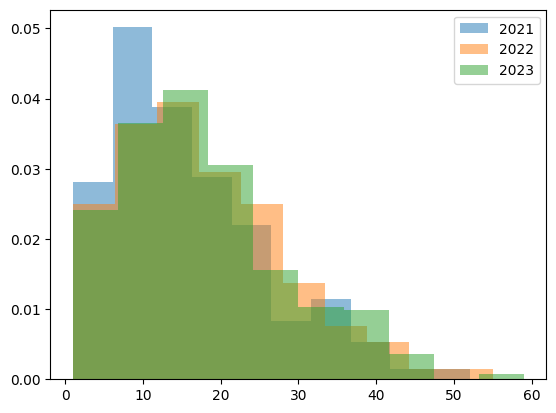

In [33]:
import matplotlib.pyplot as plt

len2021 = valid_sent[valid_sent['year']=='21']['word_cnt']
len2022 = valid_sent[valid_sent['year']=='22']['word_cnt']
len2023 = valid_sent[valid_sent['year']=='23']['word_cnt']

plt.hist(len2021, alpha=0.5, label='2021', density=True)
plt.hist(len2022, alpha=0.5, label='2022', density=True)
plt.hist(len2023, alpha=0.5, label='2023', density=True)
plt.legend(loc='upper right')
plt.show()

In [34]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
# NLTK 품사 분석 기초 리뷰
# 태그 약어 관련 문서:
# - https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
# - https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk

import nltk

test_str = valid_sent.at[26,'raw_data']
print("원문:", test_str)

text = tokenize.word_tokenize(test_str)
print("단어토큰:", text)

tagged = nltk.pos_tag(text)
print("품사태깅:", tagged)

원문: You must get to the airport quickly.
단어토큰: ['You', 'must', 'get', 'to', 'the', 'airport', 'quickly', '.']
품사태깅: [('You', 'PRP'), ('must', 'MD'), ('get', 'VB'), ('to', 'TO'), ('the', 'DT'), ('airport', 'NN'), ('quickly', 'RB'), ('.', '.')]


In [36]:
print("tag리스트의 형:", type(tagged))
print("tag리스트 각 값의 형:", type(tagged[0]))
print(tagged[0]) # 하나의 단어-품사 세트(튜플) 출력
print(tagged[0][0]) # 0번 단어-품사 세트 튜플에서 단어 값 출력
print(tagged[0][1]) # 0번 단어-품사 세트 튜플에서 품사 값 출력

tag리스트의 형: <class 'list'>
tag리스트 각 값의 형: <class 'tuple'>
('You', 'PRP')
You
PRP


In [37]:
## valid_sent 데이터프레임의 각 raw_data에 동사가 있는지 없는지 확인하는 sentence checker2 작성

# verb counting 체커
def sent_Checker2(txt):

    # 동사가 포함되었는지 확인하는 기능 구현

    tokens = tokenize.word_tokenize(txt)
    tagged = nltk.pos_tag(tokens)

    vb_counter = 0 # 동사 개수 집계

    for tag in tagged:
        if tag[1]=='VB': #VBP 동사현재형,
            vb_counter +=1

    if vb_counter>0:

        return True

    else:
        return False

In [38]:
sentences_df['Checker2'] = sentences_df['raw_data'].apply(lambda x: 1 if sent_Checker2(x) else 0)

sentences_df.head()

,year,raw_data,Checker1,Checker2
0,21,BFB5BEEE5FC8A62E687770 1 8 1 17 .,0,0
1,21,"1 15 , 16 17 .",0,0
2,21,.,0,0
3,21,"1. , .",0,0
4,21,"2. , .",0,0


In [39]:
sentences_df[50:60]

,year,raw_data,Checker1,Checker2
50,21,Call me when my washing machine is repaired.,1,1
51,21,Exactly.,1,0
52,21,I m glad that you bought the displayed one.,1,0
53,21,"14. , .",0,0
54,21,3 Man Don t worry.,0,0
55,21,I already found his briefcase.,1,0
56,21,Of course.,1,0
57,21,You deserve to receive the award.,1,1
58,21,Don t mention it.,1,0
59,21,I just did my duty as a citizen.,1,0


In [40]:
print("정규식활용 비문필터:", len(sentences_df[sentences_df['Checker1']==1]))
print("동사포함필터:", len(sentences_df[sentences_df['Checker2']==1]))

정규식활용 비문필터: 988
동사포함필터: 533


In [41]:
# 랜덤 검사
sentences_df[520:530]

,year,raw_data,Checker1,Checker2
520,22,Scientists need only understand how to use the...,1,1
521,22,These elements of shared practice thus need no...,1,1
522,22,"Indeed, one role of a paradigm is to enable sc...",1,1
523,22,Thomas Kuhn noted that scientists can agree in...,1,1
524,22,Lack of a standard interpretation or of an agr...,1,1
525,22,difficulty in drawing novel theories from exis...,0,0
526,22,Mending and restoring objects often require ev...,1,0
527,22,The preindustrial blacksmith made things to or...,1,0
528,22,Customers would bring things back if something...,1,1
529,22,With industrialization and eventually with mas...,1,0


In [42]:
# 샘플 데이터를 탐색해보니, 이상한 결과들이 있어 검사필요

test_str = sentences_df.at[522, 'raw_data']
print("원문:", test_str)

text = tokenize.word_tokenize(test_str)
print("단어토큰:", text)

tagged = nltk.pos_tag(text)
print("품사태깅:", tagged)

원문: Indeed, one role of a paradigm is to enable scientists to work successfully without having to provide a detailed account of what they are doing or what they believe about it.
단어토큰: ['Indeed', ',', 'one', 'role', 'of', 'a', 'paradigm', 'is', 'to', 'enable', 'scientists', 'to', 'work', 'successfully', 'without', 'having', 'to', 'provide', 'a', 'detailed', 'account', 'of', 'what', 'they', 'are', 'doing', 'or', 'what', 'they', 'believe', 'about', 'it', '.']
품사태깅: [('Indeed', 'RB'), (',', ','), ('one', 'CD'), ('role', 'NN'), ('of', 'IN'), ('a', 'DT'), ('paradigm', 'NN'), ('is', 'VBZ'), ('to', 'TO'), ('enable', 'JJ'), ('scientists', 'NNS'), ('to', 'TO'), ('work', 'VB'), ('successfully', 'RB'), ('without', 'IN'), ('having', 'VBG'), ('to', 'TO'), ('provide', 'VB'), ('a', 'DT'), ('detailed', 'JJ'), ('account', 'NN'), ('of', 'IN'), ('what', 'WP'), ('they', 'PRP'), ('are', 'VBP'), ('doing', 'VBG'), ('or', 'CC'), ('what', 'WP'), ('they', 'PRP'), ('believe', 'VBP'), ('about', 'IN'), ('it', 'PRP

In [43]:
# 1. 탐색적 검사 결과, VB의 다양한 변형
# (현재단수, 과거형, 동명사, 분사 등)을 고려하지 못해서 나타난 현상(VBZ 등 추가)
# 2. join 등 동사와 명사가 같은 형태인 경우 nltk pos tagger 의 동작을 
# 미리 예측하기 어려움

# verb counting 체커 변형

def sent_Checker3(txt):

    # 동사(및 동사 변형 품사)가 포함되었는지 확인하는 기능 구현

    tokens = tokenize.word_tokenize(txt)
    tagged = nltk.pos_tag(tokens)

    vb_counter = 0 # 동사 개수 집계
    vb_tags=['VB', 'VBD', 'VBZ', 'VBG', 'VBN', 'VBP'] #동사 원형 및 변형 품사 태그

    for tag in tagged:
        if tag[1] in vb_tags:
            vb_counter +=1

    if vb_counter>0:

        return True

    else:
        return False

In [44]:
# checker3 적용
sentences_df['Checker3'] = sentences_df['raw_data'].apply(lambda x: 1 if sent_Checker3(x) else 0)

# checker별 개수확인
print("정규식활용 대문자시작 마침표종료 필터:", len(sentences_df[sentences_df['Checker1']==1]))
#얘도 동사는 있잖아~
print("동사 원형 포함 필터:", len(sentences_df[sentences_df['Checker2']==1]))
print("동사 원형+변형 포함 필터:", len(sentences_df[sentences_df['Checker3']==1]))
#숫자로 시작하는 것도 포함하기 때문!

정규식활용 대문자시작 마침표종료 필터: 988
동사 원형 포함 필터: 533
동사 원형+변형 포함 필터: 1023


In [45]:
# 추가 검사
sentences_df[520:530]

,year,raw_data,Checker1,Checker2,Checker3
520,22,Scientists need only understand how to use the...,1,1,1
521,22,These elements of shared practice thus need no...,1,1,1
522,22,"Indeed, one role of a paradigm is to enable sc...",1,1,1
523,22,Thomas Kuhn noted that scientists can agree in...,1,1,1
524,22,Lack of a standard interpretation or of an agr...,1,1,1
525,22,difficulty in drawing novel theories from exis...,0,0,1
526,22,Mending and restoring objects often require ev...,1,0,1
527,22,The preindustrial blacksmith made things to or...,1,0,1
528,22,Customers would bring things back if something...,1,1,1
529,22,With industrialization and eventually with mas...,1,0,1


In [46]:
## nitrogen fertilizer manure legume 31 34 . 이게 동사 포함으로 분석되지만, 이상함. 
# nltk 기본 pos tag 의 한계
# 단, 해당문장이 checker1에서는 걸러진다.

test_str = sentences_df.at[525, 'raw_data']
print("원문:", test_str)

text = tokenize.word_tokenize(test_str)
print("단어토큰:", text)

tagged = nltk.pos_tag(text)
print("품사태깅:", tagged)

원문: difficulty in drawing novel theories from existing paradigms significant influence of personal beliefs in scientific fields key factors that promote the rise of innovative paradigms roles of a paradigm in grouping like minded researchers functional aspects of a paradigm in scientific research 24. ?
단어토큰: ['difficulty', 'in', 'drawing', 'novel', 'theories', 'from', 'existing', 'paradigms', 'significant', 'influence', 'of', 'personal', 'beliefs', 'in', 'scientific', 'fields', 'key', 'factors', 'that', 'promote', 'the', 'rise', 'of', 'innovative', 'paradigms', 'roles', 'of', 'a', 'paradigm', 'in', 'grouping', 'like', 'minded', 'researchers', 'functional', 'aspects', 'of', 'a', 'paradigm', 'in', 'scientific', 'research', '24.', '?']
품사태깅: [('difficulty', 'NN'), ('in', 'IN'), ('drawing', 'VBG'), ('novel', 'JJ'), ('theories', 'NNS'), ('from', 'IN'), ('existing', 'VBG'), ('paradigms', 'NN'), ('significant', 'JJ'), ('influence', 'NN'), ('of', 'IN'), ('personal', 'JJ'), ('beliefs', 'NNS'), 

In [47]:
# Checker1 과 Checker3 모두 충족되는 문장만 분석대상으로 삼기로 한다.

sentences_df['LastCheck'] = sentences_df.apply(lambda row: 1 if row['Checker1']+row['Checker3']==2 else 0, axis=1)
#--> 이거는 숫자를 버리게 된다!

#집계로 확인
print("정규식활용 필터(Checker):", len(sentences_df[sentences_df['Checker1']==1]))
print("동사 원형+변형 포함 필터(Checker3):", len(sentences_df[sentences_df['Checker3']==1]))
print("동사 원형+변형 포함 필터(LastCheck):", len(sentences_df[sentences_df['LastCheck']==1]))
#--> 이거는 숫자를 버리게 된다!

정규식활용 필터(Checker): 988
동사 원형+변형 포함 필터(Checker3): 1023
동사 원형+변형 포함 필터(LastCheck): 893


In [48]:
# 그럼에도 불구하고 이상한 데이터가 많다. 
# 여러 문법조건을 분석하여 Checker 를 추가 개발할 수 있지만 skip.

sentences_df[660:670]

,year,raw_data,Checker1,Checker2,Checker3,LastCheck
660,22,B Because of the inner qualities with which th...,1,0,1,1
661,22,"However, the world the reader encounters in li...",1,0,1,1
662,22,C The existing world faced by the individual i...,1,0,1,1
663,22,This chaos only gets processed and modified wh...,1,0,1,1
664,22,3 deviate endow heritage A C B B A C B C A C A...,0,0,0,0
665,22,38.,0,0,0,0
666,22,Retraining current employees for new positions...,1,1,1,1
667,22,"Introduction of robots into factories, while e...",1,0,1,1
668,22,It is the responsibility of management to prev...,1,1,1,1
669,22,"For example, robots could be introduced only i...",1,1,1,1


In [49]:
sentences_df[110:120]

,year,raw_data,Checker1,Checker2,Checker3,LastCheck
110,21,.,0,0,0,0
111,21,.,0,0,0,0
112,21,.,0,0,0,0
113,21,.,0,0,0,0
114,21,18 .,0,0,0,0
115,21,.,0,0,0,0
116,21,3 3 8 21. the role of the lion s historians ?,0,0,0,0
117,21,"There is an African proverb that says, Till th...",1,1,1,1
118,21,"The proverb is about power, control and law ma...",1,0,1,1
119,21,Environmental journalists have to play the rol...,1,1,1,1


In [50]:
# 이제 to 부정사 식별 및 태깅 작업을 준비한다.
# 실제 to 부정사가 포함된 문장 하나를 샘플로 확인.
# 인덱스 110, 117, 118, 119 실행 환경에 따라 달라질 수 있고, 그경우 각자 찾아본다.

test_str = sentences_df.at[325, 'raw_data']
print("원문:", test_str)

text = tokenize.word_tokenize(test_str)
print("단어토큰:", text)

tagged = nltk.pos_tag(text)
print("품사태깅:", tagged)

원문: It is very unusual for an Amazonian leader to give an order.
단어토큰: ['It', 'is', 'very', 'unusual', 'for', 'an', 'Amazonian', 'leader', 'to', 'give', 'an', 'order', '.']
품사태깅: [('It', 'PRP'), ('is', 'VBZ'), ('very', 'RB'), ('unusual', 'JJ'), ('for', 'IN'), ('an', 'DT'), ('Amazonian', 'JJ'), ('leader', 'NN'), ('to', 'TO'), ('give', 'VB'), ('an', 'DT'), ('order', 'NN'), ('.', '.')]


In [51]:
# 품사 값이 'TO' 다음에 'VB' 또는 'VBP' 가 이어지는 경우 --> 1 로 태깅, 아닌 경우는 0으로 표시
# Pos(Part of Speech) Tagging 관련 위키: https://en.wikipedia.org/wiki/Part-of-speech_tagging


# 접근 방법 1. pos_tagged_list(단어, 품사 리스트) 전체 데이터를
# 컬럼 추가 후 각 리스트에서 반복문으로 스캔

# import nltk

# 태그정보 컬럼 추가
sentences_df['pos_tags'] = sentences_df['raw_data'].apply(lambda x: nltk.pos_tag(tokenize.word_tokenize(x)))
sentences_df[140:150] #임의 구간 preview

,year,raw_data,Checker1,Checker2,Checker3,LastCheck,pos_tags
140,21,23. ?,0,0,0,0,"[(23., CD), (?, .)]"
141,21,3 Difficulties arise when we do not think of p...,0,1,1,0,"[(3, CD), (Difficulties, NNS), (arise, RB), (w..."
142,21,This ends up requiring people to behave in mac...,1,1,1,1,"[(This, DT), (ends, VBZ), (up, RP), (requiring..."
143,21,"We expect people to monitor machines, which me...",1,1,1,1,"[(We, PRP), (expect, VBP), (people, NNS), (to,..."
144,21,We require people to do repeated operations wi...,1,1,1,1,"[(We, PRP), (require, VBP), (people, NNS), (to..."
145,21,When we divide up the machine and human compon...,1,1,1,1,"[(When, WRB), (we, PRP), (divide, VBP), (up, R..."
146,21,"Yet, when people fail, they are blamed.",1,0,1,1,"[(Yet, RB), (,, ,), (when, WRB), (people, NNS)..."
147,21,difficulties of overcoming human weaknesses to...,0,1,1,0,"[(difficulties, NNS), (of, IN), (overcoming, V..."
148,21,People don t usually think of touch as a tempo...,1,0,1,1,"[(People, NNS), (don, VBP), (t, JJ), (usually,..."
149,21,You can carry out an experiment to see for you...,1,1,1,1,"[(You, PRP), (can, MD), (carry, VB), (out, RP)..."


In [52]:
# def to_filter(tag):
#     for i in range(len(tag)):
        
#         if tag[i][1] == 'TO':
#             if i!=(len(tag)-1):
#                 if tag[i+1][1] == 'VB' or tag[i+1][1] == 'VBP':
                    
#                     return(True)
#         else:
#             continue
#     return(False)

#     # 동사(및 동사 변형 품사)가 포함되었는지 확인하는 기능 구현
    


In [53]:
# To 부정사 식별

def extract_pos_tags(tag_list):

    for i in range(len(tag_list)):

        # 현재 튜플의 품사값이 'TO'인지 확인
        # 원문의 값이 아닌 품사 태그의 TO를 뜻함. 인덱스 확인.
        # 튜플[0]=원문의 스트링값, 튜플[1]=품사태그
        if tag_list[i][1] == 'TO':

            #마지막 튜플이 아니라면, 그 다음 튜플의 품사값이 동사인지 확인
            if i!=(len(tag_list)-1):
                if tag_list[i+1][1] == 'VB' or tag_list[i+1][1] == 'VBP':

                    return(True)

        else:
            continue

    return(False)

# 태그정보 컬럼 추가
sentences_df['to_vb'] = sentences_df['pos_tags'].apply(lambda x: extract_pos_tags(x))
sentences_df[sentences_df['to_vb'] == True]['pos_tags']

28      [(I, PRP), (didn, VBP), (t, RB), (know, VBP), ...
36      [(I, PRP), (don, VBP), (t, JJ), (want, VBP), (...
57      [(You, PRP), (deserve, VBP), (to, TO), (receiv...
61      [(I, PRP), (want, VBP), (to, TO), (go, VB), (t...
65      [(3, CD), (Ben, NNP), (Feel, NNP), (free, JJ),...
                              ...                        
1440    [(Using, VBG), (checklists, NNS), (to, TO), (e...
1452    [(Dad, NNP), (will, MD), (be, VB), (surprised,...
1456    [(Seeing, VBG), (vivid, NN), (red, JJ), (and, ...
1471    [(He, PRP), (s, VBZ), (kept, VBD), (it, PRP), ...
1477    [(It, PRP), (was, VBD), (their, PRP$), (dad, N...
Name: pos_tags, Length: 309, dtype: object

In [54]:
sentences_df[sentences_df['to_vb'] == True]['pos_tags']

28      [(I, PRP), (didn, VBP), (t, RB), (know, VBP), ...
36      [(I, PRP), (don, VBP), (t, JJ), (want, VBP), (...
57      [(You, PRP), (deserve, VBP), (to, TO), (receiv...
61      [(I, PRP), (want, VBP), (to, TO), (go, VB), (t...
65      [(3, CD), (Ben, NNP), (Feel, NNP), (free, JJ),...
                              ...                        
1440    [(Using, VBG), (checklists, NNS), (to, TO), (e...
1452    [(Dad, NNP), (will, MD), (be, VB), (surprised,...
1456    [(Seeing, VBG), (vivid, NN), (red, JJ), (and, ...
1471    [(He, PRP), (s, VBZ), (kept, VBD), (it, PRP), ...
1477    [(It, PRP), (was, VBD), (their, PRP$), (dad, N...
Name: pos_tags, Length: 309, dtype: object

In [55]:
# 결과가 True 인 것들 샘플 탐색
# 위 head 결과를 보고 인덱스로 찾거나, 그냥 true 인 데이터를 찾아서 검사

test_str = sentences_df[sentences_df['to_vb']==True]['raw_data'].values[4]
print("원문:", test_str)

text = tokenize.word_tokenize(test_str)
print("단어토큰:", text)

tagged = nltk.pos_tag(text)
print("품사태깅:", tagged)

원문: 3 Ben Feel free to take the tomatoes from my backyard.
단어토큰: ['3', 'Ben', 'Feel', 'free', 'to', 'take', 'the', 'tomatoes', 'from', 'my', 'backyard', '.']
품사태깅: [('3', 'CD'), ('Ben', 'NNP'), ('Feel', 'NNP'), ('free', 'JJ'), ('to', 'TO'), ('take', 'VB'), ('the', 'DT'), ('tomatoes', 'NNS'), ('from', 'IN'), ('my', 'PRP$'), ('backyard', 'NN'), ('.', '.')]


In [56]:
# 접근 방법 2. pos_tagged_list(단어, 품사 리스트)에서 
# 품사만 추출해서 스트링으로 만들어서 컬럼 추가 후, re.search 활용
# 품사 데이터에서 "TO_VB" 또는 "TO_VBP" 를 포함하는지 검색

def only_pos_tags(data):

    text = tokenize.word_tokenize(data)

    tagged = nltk.pos_tag(text)

    only_tags =""

    for pos in tagged:
        only_tags += str(pos[1])+"_"

    return(only_tags)

sentences_df['only_tags'] = sentences_df['raw_data'].apply(lambda x: only_pos_tags(x))
sentences_df[140:150]

,year,raw_data,Checker1,Checker2,Checker3,LastCheck,pos_tags,to_vb,only_tags
140,21,23. ?,0,0,0,0,"[(23., CD), (?, .)]",False,CD_._
141,21,3 Difficulties arise when we do not think of p...,0,1,1,0,"[(3, CD), (Difficulties, NNS), (arise, RB), (w...",False,CD_NNS_RB_WRB_PRP_VBP_RB_VB_IN_NNS_CC_NNS_IN_J...
142,21,This ends up requiring people to behave in mac...,1,1,1,1,"[(This, DT), (ends, VBZ), (up, RP), (requiring...",True,"DT_VBZ_RP_VBG_NNS_TO_VB_IN_NN_IN_NN_,_IN_NNS_W..."
143,21,"We expect people to monitor machines, which me...",1,1,1,1,"[(We, PRP), (expect, VBP), (people, NNS), (to,...",True,"PRP_VBP_NNS_TO_VB_NNS_,_WDT_VBZ_VBG_VB_IN_RB_N..."
144,21,We require people to do repeated operations wi...,1,1,1,1,"[(We, PRP), (require, VBP), (people, NNS), (to...",True,PRP_VBP_NNS_TO_VB_VBN_NNS_IN_DT_JJ_NN_CC_NN_VB...
145,21,When we divide up the machine and human compon...,1,1,1,1,"[(When, WRB), (we, PRP), (divide, VBP), (up, R...",True,WRB_PRP_VBP_RP_DT_NN_CC_JJ_NNS_IN_DT_NN_IN_DT_...
146,21,"Yet, when people fail, they are blamed.",1,0,1,1,"[(Yet, RB), (,, ,), (when, WRB), (people, NNS)...",False,"RB_,_WRB_NNS_VBP_,_PRP_VBP_VBN_._"
147,21,difficulties of overcoming human weaknesses to...,0,1,1,0,"[(difficulties, NNS), (of, IN), (overcoming, V...",True,NNS_IN_VBG_JJ_NNS_TO_VB_NN_NNS_IN_VBG_NNS_CC_N...
148,21,People don t usually think of touch as a tempo...,1,0,1,1,"[(People, NNS), (don, VBP), (t, JJ), (usually,...",False,"NNS_VBP_JJ_RB_VBP_IN_NN_IN_DT_JJ_NN_,_CC_PRP_V..."
149,21,You can carry out an experiment to see for you...,1,1,1,1,"[(You, PRP), (can, MD), (carry, VB), (out, RP)...",True,PRP_MD_VB_RP_DT_NN_TO_VB_IN_PRP_._


In [57]:
# only_tags 컬럼(스트링)에서 "TO_VB" 또는 "TO_VBP" 를 포함하는지 검색

def to_vb_finder(data):

    if "TO_VB" in data or "TO_VBP" in data: #TO_VBZ_XX_
        return(True)

    else:
        return(False)

sentences_df['to_vb_2'] = sentences_df['only_tags'].apply(lambda x: to_vb_finder(x))

sentences_df[140:150]

,year,raw_data,Checker1,Checker2,Checker3,LastCheck,pos_tags,to_vb,only_tags,to_vb_2
140,21,23. ?,0,0,0,0,"[(23., CD), (?, .)]",False,CD_._,False
141,21,3 Difficulties arise when we do not think of p...,0,1,1,0,"[(3, CD), (Difficulties, NNS), (arise, RB), (w...",False,CD_NNS_RB_WRB_PRP_VBP_RB_VB_IN_NNS_CC_NNS_IN_J...,False
142,21,This ends up requiring people to behave in mac...,1,1,1,1,"[(This, DT), (ends, VBZ), (up, RP), (requiring...",True,"DT_VBZ_RP_VBG_NNS_TO_VB_IN_NN_IN_NN_,_IN_NNS_W...",True
143,21,"We expect people to monitor machines, which me...",1,1,1,1,"[(We, PRP), (expect, VBP), (people, NNS), (to,...",True,"PRP_VBP_NNS_TO_VB_NNS_,_WDT_VBZ_VBG_VB_IN_RB_N...",True
144,21,We require people to do repeated operations wi...,1,1,1,1,"[(We, PRP), (require, VBP), (people, NNS), (to...",True,PRP_VBP_NNS_TO_VB_VBN_NNS_IN_DT_JJ_NN_CC_NN_VB...,True
145,21,When we divide up the machine and human compon...,1,1,1,1,"[(When, WRB), (we, PRP), (divide, VBP), (up, R...",True,WRB_PRP_VBP_RP_DT_NN_CC_JJ_NNS_IN_DT_NN_IN_DT_...,True
146,21,"Yet, when people fail, they are blamed.",1,0,1,1,"[(Yet, RB), (,, ,), (when, WRB), (people, NNS)...",False,"RB_,_WRB_NNS_VBP_,_PRP_VBP_VBN_._",False
147,21,difficulties of overcoming human weaknesses to...,0,1,1,0,"[(difficulties, NNS), (of, IN), (overcoming, V...",True,NNS_IN_VBG_JJ_NNS_TO_VB_NN_NNS_IN_VBG_NNS_CC_N...,True
148,21,People don t usually think of touch as a tempo...,1,0,1,1,"[(People, NNS), (don, VBP), (t, JJ), (usually,...",False,"NNS_VBP_JJ_RB_VBP_IN_NN_IN_DT_JJ_NN_,_CC_PRP_V...",False
149,21,You can carry out an experiment to see for you...,1,1,1,1,"[(You, PRP), (can, MD), (carry, VB), (out, RP)...",True,PRP_MD_VB_RP_DT_NN_TO_VB_IN_PRP_._,True


In [58]:
# 샘플만 보면 비슷한 결과지만, 차이가 있음

print("접근1:", sum(sentences_df['to_vb']))
print("접근2:", sum(sentences_df['to_vb_2']))

접근1: 309
접근2: 317


In [59]:
# 차이가 나는 결과를 확인해본다.

sentences_df[(sentences_df['to_vb'] == False) & (sentences_df['to_vb_2'] == True)]

,year,raw_data,Checker1,Checker2,Checker3,LastCheck,pos_tags,to_vb,only_tags,to_vb_2
267,21,Humor reframes potentially divisive events int...,1,0,1,1,"[(Humor, NNP), (reframes, VBZ), (potentially, ...",False,NNP_VBZ_RB_JJ_NNS_IN_RB_JJ_NNS_WDT_VBP_VBN_IN_...,True
363,21,"This time, c the playful and curious boy was i...",1,1,1,1,"[(This, DT), (time, NN), (,, ,), (c, VB), (the...",False,"DT_NN_,_VB_DT_NN_CC_JJ_NN_VBD_JJ_IN_PRP$_NN_NN...",True
468,22,I am looking forward to hearing from you.,1,0,1,1,"[(I, PRP), (am, VBP), (looking, VBG), (forward...",False,PRP_VBP_VBG_NN_TO_VBG_IN_PRP_._,True
627,22,Elinor Ostrom found that there are several fac...,1,0,1,1,"[(Elinor, NNP), (Ostrom, NNP), (found, VBD), (...",False,NNP_NNP_VBD_IN_EX_VBP_JJ_NNS_JJ_TO_VBG_IN_JJ_J...,True
996,23,Thus the individual water forager s response t...,1,0,1,1,"[(Thus, RB), (the, DT), (individual, JJ), (wat...",False,RB_DT_JJ_NN_NN_VBP_NN_TO_VBG_NN_RP_CC_RB_NNS_N...,True
1001,23,The narrowing of our consciousness of time smo...,1,0,1,1,"[(The, DT), (narrowing, NN), (of, IN), (our, P...",False,DT_NN_IN_PRP$_NN_IN_NN_NNS_DT_NN_TO_VBG_PRP_IN...,True
1367,23,Thus the individual water forager s response t...,1,0,1,1,"[(Thus, RB), (the, DT), (individual, JJ), (wat...",False,RB_DT_JJ_NN_NN_VBP_NN_TO_VBG_NN_RP_CC_RB_NNS_N...,True
1372,23,The narrowing of our consciousness of time smo...,1,0,1,1,"[(The, DT), (narrowing, NN), (of, IN), (our, P...",False,DT_NN_IN_PRP$_NN_IN_NN_NNS_DT_NN_TO_VBG_PRP_IN...,True


In [60]:
# 227번 인덱스 문장은 "to unifying" 구간에서 차이를 만듬.
# 문법적으로 unifying 은 gerund(동명사)

sentences_df.at[267, 'raw_data']

'Humor reframes potentially divisive events into merely laughable ones which are put in perspective as subservient to unifying values held by organization members.'

In [61]:
sentences_df.at[267, 'pos_tags']
#초반에 했을 때 filter는 to VB , VBN만 넣었음 ㅇㅇ


[('Humor', 'NNP'),
 ('reframes', 'VBZ'),
 ('potentially', 'RB'),
 ('divisive', 'JJ'),
 ('events', 'NNS'),
 ('into', 'IN'),
 ('merely', 'RB'),
 ('laughable', 'JJ'),
 ('ones', 'NNS'),
 ('which', 'WDT'),
 ('are', 'VBP'),
 ('put', 'VBN'),
 ('in', 'IN'),
 ('perspective', 'NN'),
 ('as', 'IN'),
 ('subservient', 'NN'),
 ('to', 'TO'),
 ('unifying', 'VBG'),
 ('values', 'NNS'),
 ('held', 'VBN'),
 ('by', 'IN'),
 ('organization', 'NN'),
 ('members', 'NNS'),
 ('.', '.')]

In [62]:
sentences_df.at[267, 'only_tags']

'NNP_VBZ_RB_JJ_NNS_IN_RB_JJ_NNS_WDT_VBP_VBN_IN_NN_IN_NN_TO_VBG_NNS_VBN_IN_NN_NNS_._'

In [63]:

## 연도별 To 부정사 포함(to_vb 또는 to_vb_2 중 하나 선택) 비율을 계산하자.

years_list=sentences_df['year'].unique()
total_sent=[]
to_vb_sent=[]
#to_vb 비율은 DF 생성 후에 apply로 연산

for oneyear in years_list:

    that_year_total = len(sentences_df[(sentences_df['year']==oneyear) & (sentences_df['LastCheck']==1)])
    that_year_tobe = len(sentences_df[(sentences_df['year']==oneyear) & (sentences_df['LastCheck']==1) & (sentences_df['to_vb']==1)])

    total_sent.append(that_year_total)
    to_vb_sent.append(that_year_tobe)


report_df = pd.DataFrame({'year': years_list, 'total_sent':total_sent, 'to_do':to_vb_sent})
report_df['to_do_perc'] = report_df.apply(lambda rows: rows['to_do']/rows['total_sent'], axis=1)
report_df

,year,total_sent,to_do,to_do_perc
0,21,237,58,0.244726
1,22,217,69,0.317972
2,23,439,151,0.343964


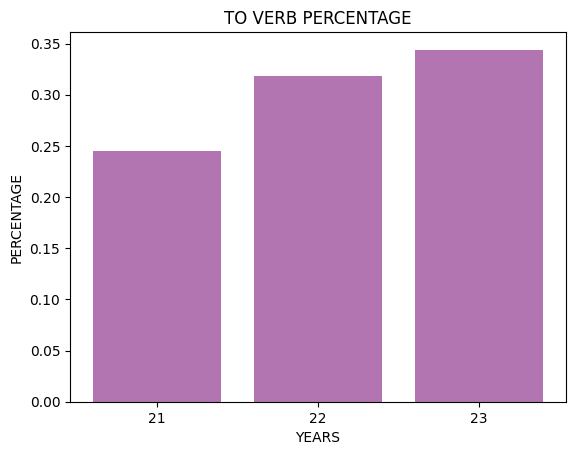

In [64]:
# import matplotlib.pyplot as plt

x=report_df['year']
y=report_df['to_do_perc']
bars=report_df['year']

plt.bar(x, y, color = (0.5,0.1,0.5,0.6))

# Add title and axis names
plt.title('TO VERB PERCENTAGE')
plt.xlabel('YEARS')
plt.ylabel('PERCENTAGE')

# Create names on the x axis
plt.xticks(x, bars)

# Show graph
plt.show()

##### Standford Core NLP 테스트

1. 아래 사이트에서 패키지 다운로드하여 작업 폴더에 압축해제
- 패키지주소: https://stanfordnlp.github.io/CoreNLP/download.html

2. 작업폴더>stanford-corenlp-4.5.1(i.e. 패키지가 설치된 루트폴더)에서 CMD 실행 후 아래 명령어를 통해 서버 실행(둘중하나 시도)
<br>

- 명령: java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000(실패)
- 명령: java -mx1024m -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000(성공)
<br>
- 참조: https://stanfordnlp.github.io/CoreNLP/corenlp-server.html
- 중요!! VSCode 쥬피터서버와 포트 충돌이 날 수 있으므로, Standford Core NLP 서버를 먼저 실행 후 쥬피터코드 실행, 만약 포트 충돌이 날경우 VS코드/쥬피터 종료후 NLP 서버 실행후 VSCode 재실행

3. pycorenlp : Standford Core NLP를 위한 python wrapper
- https://github.com/smilli/py-corenlp

In [65]:
!pip install pycorenlp

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pycorenlp: filename=pycorenlp-0.3.0-py3-none-any.whl size=2128 sha256=25721a2aeeeb1ce12a69d80b31266b2f75a7968ec59023cde0de30e152109414
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\17\02\ab\eb36312f7e3055fed374e5f0c129514fb7aca9a143f1b1b8a3
Successfully built pycorenlp


In [66]:
# 테스트용 샘플 문장

text = "I love to practice Python with my teacher."

In [67]:
# NLTK 품사 태그 활용 결과
 
print("원문:", text)

text_tokens = tokenize.word_tokenize(text)
print("단어토큰:", text_tokens)

tagged = nltk.pos_tag(text_tokens)
print("품사태깅:", tagged)

원문: I love to practice Python with my teacher.
단어토큰: ['I', 'love', 'to', 'practice', 'Python', 'with', 'my', 'teacher', '.']
품사태깅: [('I', 'PRP'), ('love', 'VBP'), ('to', 'TO'), ('practice', 'NN'), ('Python', 'NNP'), ('with', 'IN'), ('my', 'PRP$'), ('teacher', 'NN'), ('.', '.')]


In [68]:
# Standford NLP 기초 테스트

from pycorenlp import StanfordCoreNLP

nlp = StanfordCoreNLP('http://localhost:9000')

output = nlp.annotate(text, properties={
  'annotators': 'parse',
  'outputFormat': 'json'
})

print(output)

{
  "sentences": [
    {
      "index": 0,
      "parse": "(ROOT\r\n  (S\r\n    (NP (PRP I))\r\n    (VP (VBP love)\r\n      (S\r\n        (VP (TO to)\r\n          (VP (VB practice)\r\n            (NP (NN Python))\r\n            (PP (IN with)\r\n              (NP (PRP$ my) (NN teacher)))))))\r\n    (. .)))",
      "basicDependencies": [
        {
          "dep": "ROOT",
          "governor": 0,
          "governorGloss": "ROOT",
          "dependent": 2,
          "dependentGloss": "love"
        },
        {
          "dep": "nsubj",
          "governor": 2,
          "governorGloss": "love",
          "dependent": 1,
          "dependentGloss": "I"
        },
        {
          "dep": "mark",
          "governor": 4,
          "governorGloss": "practice",
          "dependent": 3,
          "dependentGloss": "to"
        },
        {
          "dep": "xcomp",
          "governor": 2,
          "governorGloss": "love",
          "dependent": 4,
          "dependentGloss": "practice"


In [69]:
# 위 분석 값에서 Parse 키에 들어 있는 값이 문법분석의 요약본이다. 이를 이용해 트리로 표현할 수 있다.
# 트리는 NLTK의 문법 트리 메소를 사용해야 한다.
# 단, NLTK 트리 메소드는 JSON 형을 입력받는다.
# 상기 parse 의 값은 json 처럼 보이지만, json 아니다!
# 따라서, parse 의 값을 json으로 변형 후, NLTK 트리에 입력하려고 한다.

import json

parsed = json.loads(output)
parsed_str = parsed['sentences'][0]['parse']
parsed_str

'(ROOT\r\n  (S\r\n    (NP (PRP I))\r\n    (VP (VBP love)\r\n      (S\r\n        (VP (TO to)\r\n          (VP (VB practice)\r\n            (NP (NN Python))\r\n            (PP (IN with)\r\n              (NP (PRP$ my) (NN teacher)))))))\r\n    (. .)))'

In [70]:
from nltk.tree import Tree

Tree.fromstring(parsed_str).pretty_print()

                       ROOT                           
                        |                              
                        S                             
  ______________________|___________________________   
 |        VP                                        | 
 |    ____|_____________                            |  
 |   |                  S                           | 
 |   |                  |                           |  
 |   |                  VP                          | 
 |   |     _____________|_____                      |  
 |   |    |                   VP                    | 
 |   |    |      _____________|____                 |  
 |   |    |     |       |          PP               | 
 |   |    |     |       |      ____|____            |  
 NP  |    |     |       NP    |         NP          | 
 |   |    |     |       |     |     ____|_____      |  
PRP VBP   TO    VB      NN    IN  PRP$        NN    . 
 |   |    |     |       |     |    |          |     |  
 

- NLTK pos_tag 기능만 활용시 'to practice'의 'practice'를 명사(NN)으로 태깅하는 경우가 대부분이었으나, Standford Core NLP 구문분석기는 'to practice'의 'practice'를 동사'vb'로 식별하여, to + vb 부정사 형태로 추출할 수 있는 데이터를 제공함.